In [5]:
##import everything
import LJ_mol as LJ
from LJ_mol import molecule as molecule
import random
import numpy as np
import matplotlib.pyplot as plt
import LJ_grid 
from LJ_grid import grid
import time

xlow = -1
xup = 1
ylow = -1 
yup = 1

# Test 1: Two particles attracting
(Implicitly the cut-off distance is the length of the whole domain, which is very bad for computational efficiency but doesn't matter for a small number of particles)

[array([ 0.        , -0.22116933]), array([0.        , 0.22116933])]


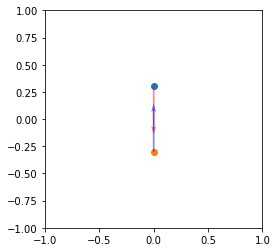

In [59]:
import LJ_grid 
from LJ_grid import grid
n_part=2
sigma=0.5
eps=0.05
positions = [[0,0.3],[0,-0.3]]


mols = [molecule(pos=positions[i], sigma=sigma, eps=eps) for i in range(len(positions))]
grid_x_steps = 1
grid_y_steps = 1

grid = grid(xlow=xlow, xup=xup, ylow=ylow, yup=yup, mols=mols, grid_x_steps=grid_x_steps,
            grid_y_steps=grid_y_steps)
grid.calc_pairlist()
#print("DEBUGLIST "+str(grid.debugpair))

grid.updateForce()


for i in range(len(positions)):
   plt.scatter(positions[i][0],positions[i][1])
plt.xlim((-1,1))
plt.ylim((-1,1))


V = [grid.mols[i].force for i in range(len(grid.mols))]
print(V)
origin = np.array([[grid.mols[i].pos[0] for i in range(len(grid.mols))],[grid.mols[i].pos[1] for i in range(len(grid.mols))]]) # origin point
xcoord = [V[i][0] for i in range(len(V))]
ycoord = [V[i][1] for i in range(len(V))]
plt.quiver(*origin,xcoord, ycoord, color=['r','b','g'], alpha=0.5, scale=1)


plt.gca().set_aspect('equal')
plt.show()


# Test 2: 2 particles repelling

[array([0.        , 0.42827454]), array([ 0.        , -0.42827454])]


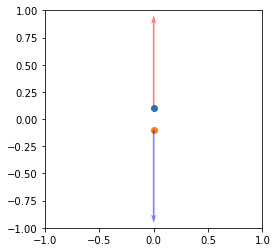

In [60]:
import LJ_grid 
from LJ_grid import grid
n_part=2
sigma=0.5
eps=0.00000003
positions = [[0,0.1],[0,-0.1]]


mols = [molecule(pos=positions[i], sigma=sigma, eps=eps) for i in range(len(positions))]
grid_x_steps = 2
grid_y_steps=2

grid = grid(xlow=xlow, xup=xup, ylow=ylow, yup=yup, mols=mols, grid_x_steps=grid_x_steps,
            grid_y_steps=grid_y_steps)#, cutoffdist=5)
grid.calc_pairlist()

grid.updateForce()


for i in range(len(positions)):
   plt.scatter(positions[i][0],positions[i][1])
plt.xlim((-1,1))
plt.ylim((-1,1))


V = [grid.mols[i].force for i in range(len(grid.mols))]
print(V)
origin = np.array([[grid.mols[i].pos[0] for i in range(len(grid.mols))],[grid.mols[i].pos[1] for i in range(len(grid.mols))]]) # origin point
xcoord = [V[i][0] for i in range(len(V))]
ycoord = [V[i][1] for i in range(len(V))]
plt.quiver(*origin,xcoord, ycoord, color=['r','b','g'], alpha=0.5, scale=1)


plt.gca().set_aspect('equal')
plt.show()


# Test 3: 10k molecules randomly sampled
Notice that grid_x_steps and grid_y_steps have been increased dramatically, which also means that we now have selected a cut-off distance of the domain length / grid steps (in our case, 2/40 = 0.05). (This takes somewhere around 6 seconds on my laptop)

In [61]:
import LJ_grid 
from LJ_grid import grid
sigma=0.5
eps=0.00000003

random.seed(10)

n_part = 10000
positions_34 = [[random.uniform(xlow,xup), random.uniform(ylow,yup)] for i in range(0,n_part)]
mols = [molecule(pos=positions_34[i], sigma=sigma, eps=eps) for i in range(len(positions_34))]
grid_x_steps = 40
grid_y_steps = 40

grid = grid(xlow=xlow, xup=xup, ylow=ylow, yup=yup, mols=mols, grid_x_steps=grid_x_steps,
            grid_y_steps=grid_y_steps, printflag=True)

tic = time.perf_counter()
grid.calc_pairlist()
toc= time.perf_counter()
print("Time to generate pair list: "+str(toc-tic))
print("Number of interacting pairs found: "+str(len(grid.pairlist)))

tic=time.perf_counter()
grid.updateForce()
toc = time.perf_counter()
print("Time to find forces of interacting molecules: "+str(toc-tic))



cell i= 0
cell i= 100
cell i= 200
cell i= 300
cell i= 400
cell i= 500
cell i= 600
cell i= 700
cell i= 800
cell i= 900
cell i= 1000
cell i= 1100
cell i= 1200
cell i= 1300
cell i= 1400
cell i= 1500
pairlist calculated
Time to generate pair list: 2.4355341000045883
Number of interacting pairs found: 95894
Time to find forces of interacting molecules: 1.5959511999972165


# Test 3: 10k molecules randomly sampled with bad cutoff
Notice that grid_x_steps and grid_y_steps have been decreased (so the implicit cutoff distance is 2/20~= 0.1), but it has been manually overridden to be 0.05. We'll find the same number of pairs, but this search (i.e. generation of the pairlist) will be slower. (this takes around 12 seconds on my laptop)

The force calculation time should be roughly the same (there's no real difference between this cell and the last wrt forces)

In [62]:
import LJ_grid 
from LJ_grid import grid

sigma=0.05
eps=0.00000003

random.seed(10)
mols = [molecule(pos=positions_34[i], sigma=sigma, eps=eps) for i in range(len(positions_34))]
grid_x_steps = 20
grid_y_steps = 20

grid = grid(xlow=xlow, xup=xup, ylow=ylow, yup=yup, mols=mols, grid_x_steps=grid_x_steps,
            grid_y_steps=grid_y_steps, cutoffdist=0.05)

tic = time.perf_counter()
grid.calc_pairlist()
toc= time.perf_counter()
print("Time to generate pair list: "+str(toc-tic))
assert(len(grid.pairlist)==95894)
print("Number of interacting pairs found: "+str(len(grid.pairlist)))

tic=time.perf_counter()
grid.updateForce()
toc = time.perf_counter()
print("Time to find forces of interacting molecules: "+str(toc-tic))


Time to generate pair list: 8.715219899997464
Number of interacting pairs found: 95894
Time to find forces of interacting molecules: 1.6417364000080852
